## ADALINE Adaptive Linear Neuron

In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


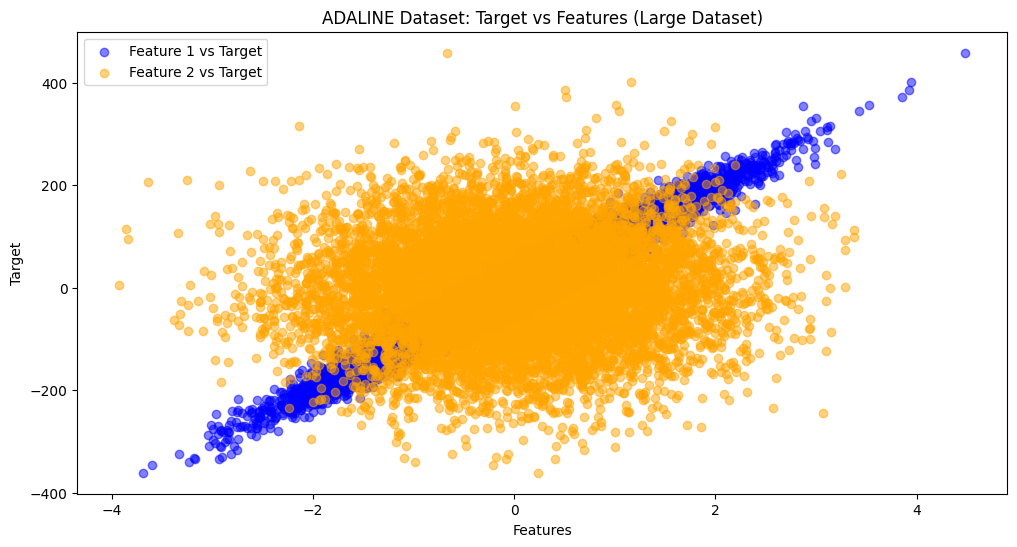

In [205]:
# Generate a larger dataset with 10,000 samples and two features
X, y = make_regression(
    n_samples=10000,  # Larger dataset
    n_features=2,     # Two-dimensional feature space
    noise=20,         # Add noise for realism
    random_state=42
)

# Visualize the relationship between features and target
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color="blue", alpha=0.5, label="Feature 1 vs Target")
plt.scatter(X[:, 1], y, color="orange", alpha=0.5, label="Feature 2 vs Target")
plt.title("ADALINE Dataset: Target vs Features (Large Dataset)")
plt.xlabel("Features")
plt.ylabel("Target")
plt.legend()
plt.show()


In [206]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
class ADALINE:
    def __init__(self, input_size, learning_rate=0.001, epochs=50):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def fit(self, X, y):
        for epoch in range(self.epochs):
            predictions = self.predict(X)
            errors = y - predictions
            self.weights += self.learning_rate * np.dot(errors, X) / len(X)
            self.bias += self.learning_rate * np.mean(errors)
            mse = np.mean(errors ** 2)  # Mean Squared Error
            print(f"Epoch {epoch + 1}/{self.epochs}, MSE: {mse:.4f}")

    def evaluate(self, X, y):
        predictions = self.predict(X)
        mse = np.mean((y - predictions) ** 2)
        return mse


In [208]:
# Initialize the ADALINE model
adaline = ADALINE(input_size=2, learning_rate=0.001, epochs=50)

# Train the model on the training set
print("\nTraining the ADALINE model:")
adaline.fit(X_train, y_train)



Training the ADALINE model:
Epoch 1/50, MSE: 9980.6434
Epoch 2/50, MSE: 9961.7832
Epoch 3/50, MSE: 9942.9601
Epoch 4/50, MSE: 9924.1741
Epoch 5/50, MSE: 9905.4250
Epoch 6/50, MSE: 9886.7128
Epoch 7/50, MSE: 9868.0374
Epoch 8/50, MSE: 9849.3988
Epoch 9/50, MSE: 9830.7968
Epoch 10/50, MSE: 9812.2314
Epoch 11/50, MSE: 9793.7026
Epoch 12/50, MSE: 9775.2102
Epoch 13/50, MSE: 9756.7542
Epoch 14/50, MSE: 9738.3346
Epoch 15/50, MSE: 9719.9511
Epoch 16/50, MSE: 9701.6039
Epoch 17/50, MSE: 9683.2927
Epoch 18/50, MSE: 9665.0175
Epoch 19/50, MSE: 9646.7784
Epoch 20/50, MSE: 9628.5751
Epoch 21/50, MSE: 9610.4076
Epoch 22/50, MSE: 9592.2759
Epoch 23/50, MSE: 9574.1798
Epoch 24/50, MSE: 9556.1193
Epoch 25/50, MSE: 9538.0944
Epoch 26/50, MSE: 9520.1050
Epoch 27/50, MSE: 9502.1509
Epoch 28/50, MSE: 9484.2322
Epoch 29/50, MSE: 9466.3487
Epoch 30/50, MSE: 9448.5004
Epoch 31/50, MSE: 9430.6872
Epoch 32/50, MSE: 9412.9091
Epoch 33/50, MSE: 9395.1659
Epoch 34/50, MSE: 9377.4577
Epoch 35/50, MSE: 9359.7843


In [209]:
# Evaluate the model on both training and testing sets
train_mse = adaline.evaluate(X_train, y_train)
test_mse = adaline.evaluate(X_test, y_test)

print(f"\nFinal Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Final Testing Mean Squared Error (MSE): {test_mse:.4f}")



Final Training Mean Squared Error (MSE): 9081.6929
Final Testing Mean Squared Error (MSE): 9272.1761


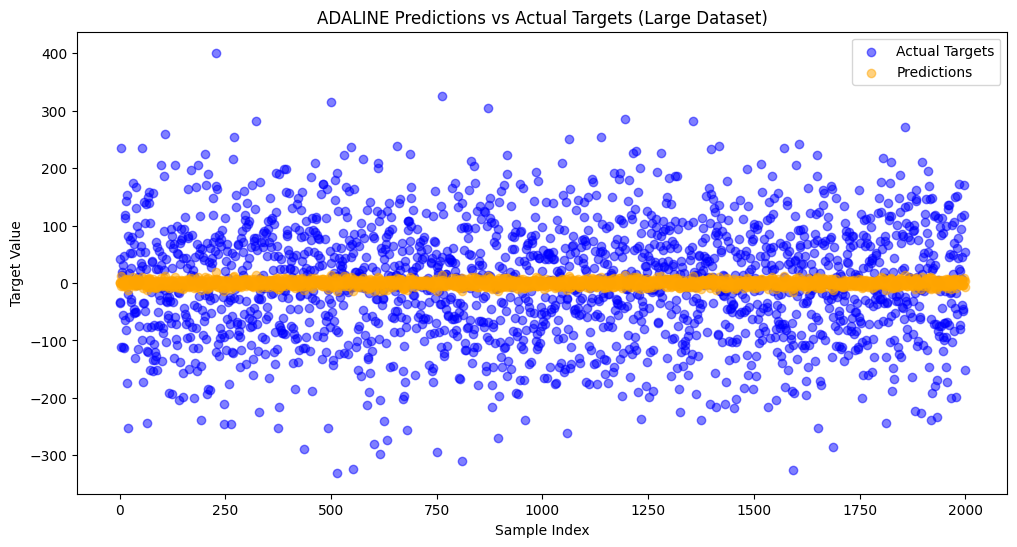

In [210]:
# Generate predictions for the test set
predictions = adaline.predict(X_test)

# Visualize predictions vs actual targets
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", alpha=0.5, label="Actual Targets")
plt.scatter(range(len(predictions)), predictions, color="orange", alpha=0.5, label="Predictions")
plt.title("ADALINE Predictions vs Actual Targets (Large Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()


In [211]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R^2 Score: {r2:.4f}")


R^2 Score: 0.0897


## Loading the dataset

In [212]:
data = pd.read_csv("housing.csv")
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].median())

X = data.drop(columns=["median_house_value", "ocean_proximity"]) 
y = data["median_house_value"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dataset prepared: missing values handled and categorical columns excluded.")


Dataset prepared: missing values handled and categorical columns excluded.


## ADALINE Class Definition and Training Algorithm

In [213]:
class ADALINE:
    def __init__(self, learning_rate=0.001, epochs=2000, regularization=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization = regularization  
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        n_samples = X.shape[0]
        
        #iterative training
        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            #batch updates
            errors = y - y_pred
            
            #weight update rule and regularisation 
            self.weights += self.learning_rate * ((1 / n_samples) * np.dot(X.T, errors) - self.regularization * self.weights)
            self.bias += self.learning_rate * (1 / n_samples) * errors.sum()

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


This ADALINE class implements a basic linear regression model using gradient descent. It learns weights and bias to minimize the prediction error over multiple iterations. Regularization ensures better generalization by controlling weight magnitudes.

## Feature Engineering, Transformation, and Dataset Preparation

In [214]:
data["total_rooms_log"] = np.log1p(data["total_rooms"])
data["population_log"] = np.log1p(data["population"])
X = data.drop(columns=["median_house_value", "ocean_proximity", "total_rooms", "population"])  # Drop target and original features
y = data["median_house_value"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = data[["median_income", "latitude", "housing_median_age"]]

## Training and Evaluating ADALINE Model

In [215]:
adaline = ADALINE(learning_rate=0.0001, epochs=12000, regularization=0.0001)
adaline.fit(X_train, y_train)

y_train_pred = adaline.predict(X_train)
y_test_pred = adaline.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}, R^2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R^2: {test_r2:.4f}")
baseline_mse = np.var(y)
print(f"Baseline MSE (variance of the target): {baseline_mse:.4f}")


Training MSE: 10612620587.6069, R^2: 0.2061
Testing MSE: 10592262745.0732, R^2: 0.1917
Baseline MSE (variance of the target): 13315503000.8181


This block prepares the dataset for modeling by:

Applying log transformations to handle skewness.

Selecting relevant features and the target variable.

Splitting the dataset into training and testing sets.

Standardizing features for better model performance.

## Visualizing ADALINE Predictions: Actual vs Predicted

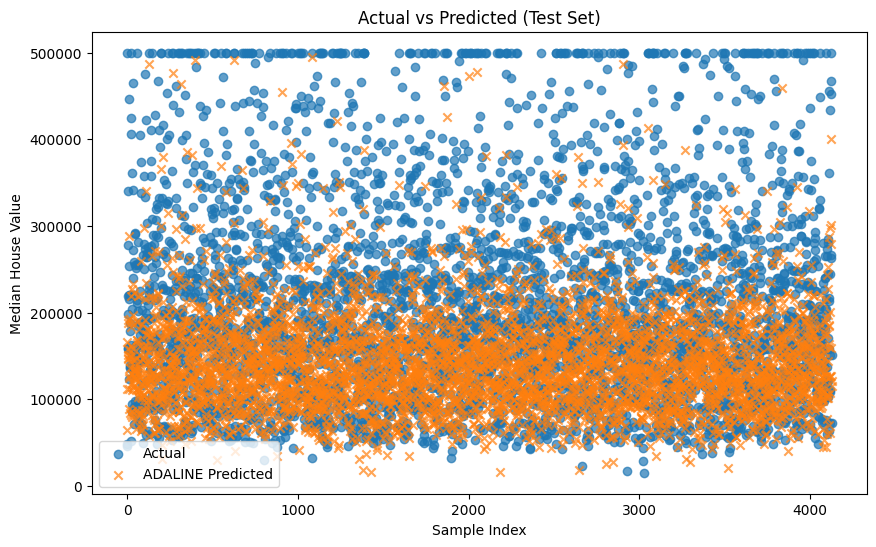

In [216]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7)
plt.scatter(range(len(y_test)), y_test_pred, label="ADALINE Predicted", alpha=0.7, marker='x')
plt.legend()
plt.title("Actual vs Predicted (Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("Median House Value")
plt.show()


The scatter plot compares the actual values (blue) and ADALINE predictions (orange) for median_house_value. The predictions are widely scattered, showing poor alignment with actual values, particularly for higher house prices. This highlights ADALINE's limitations in capturing non-linear relationships in the data, emphasizing the need for more advanced models like XGBoost for better accuracy.

## Using XGBoost. an alternative for ADALINE in today's technology 

In [217]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import xgboost
print(xgboost.__version__)

!pip install --upgrade xgboost


2.1.2


## Load, Preprocess, and Prepare Dataset for Modeling

In [218]:
data = pd.read_csv("housing.csv")

data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].median())

data["total_rooms_log"] = np.log1p(data["total_rooms"])
data["population_log"] = np.log1p(data["population"])
X = data[["median_income", "latitude", "housing_median_age", "total_rooms_log", "population_log"]]
y = data["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Define and Train XGBoost Model

In [219]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.005,
    "max_depth": 8,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "eval_metric": "rmse"
}
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=[(dtest, "validation")],
    early_stopping_rounds=50,
    verbose_eval=True
)


[0]	validation-rmse:114148.07331
[1]	validation-rmse:113821.10704
[2]	validation-rmse:113490.58209
[3]	validation-rmse:113152.34146
[4]	validation-rmse:112834.80782
[5]	validation-rmse:112527.24635
[6]	validation-rmse:112299.39439
[7]	validation-rmse:111990.82613
[8]	validation-rmse:111666.65936
[9]	validation-rmse:111365.85268
[10]	validation-rmse:111065.93410
[11]	validation-rmse:110748.59607
[12]	validation-rmse:110454.81504
[13]	validation-rmse:110154.08779
[14]	validation-rmse:109859.11915
[15]	validation-rmse:109573.66118
[16]	validation-rmse:109264.38799
[17]	validation-rmse:108956.54059
[18]	validation-rmse:108669.17881
[19]	validation-rmse:108368.36199
[20]	validation-rmse:108087.59295
[21]	validation-rmse:107805.13905
[22]	validation-rmse:107590.82248
[23]	validation-rmse:107309.62384
[24]	validation-rmse:107017.11855
[25]	validation-rmse:106729.06020
[26]	validation-rmse:106440.31313
[27]	validation-rmse:106252.06149
[28]	validation-rmse:105968.69521
[29]	validation-rmse:105

This code trains an XGBoost model using the DMatrix structure for efficient computation. It performs regression with parameters like a learning rate of 0.005, maximum tree depth of 8, and 80% subsampling for rows and columns. The model evaluates performance using RMSE and includes early stopping, halting training if the validation RMSE does not improve for 50 rounds, ensuring optimal performance and avoiding overfitting.

##  Evaluating XGBoost Model: Predictions and Metrics

In [220]:
y_train_pred_xgb = xgb_model.predict(dtrain)
y_test_pred_xgb = xgb_model.predict(dtest)

train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
print(f"XGBoost - Training MSE: {train_mse_xgb:.4f}, R^2: {train_r2_xgb:.4f}")
print(f"XGBoost - Testing MSE: {test_mse_xgb:.4f}, R^2: {test_r2_xgb:.4f}")


XGBoost - Training MSE: 1459726041.9141, R^2: 0.8908
XGBoost - Testing MSE: 4021544395.8610, R^2: 0.6931


The XGBoost model demonstrates strong performance, with a Training MSE of 1.46 billion and R2 of 0.8908, indicating it captures 89.1% of the variance in training data. On the test set, the MSE is 4.02 billion, and R2 is 0.6931, showing good generalization and explaining 69.3% of the variance in unseen data. This reflects the model's effectiveness in handling the dataset's complexity.

## Visualizing XGBoost Predictions: Actual vs Predicted

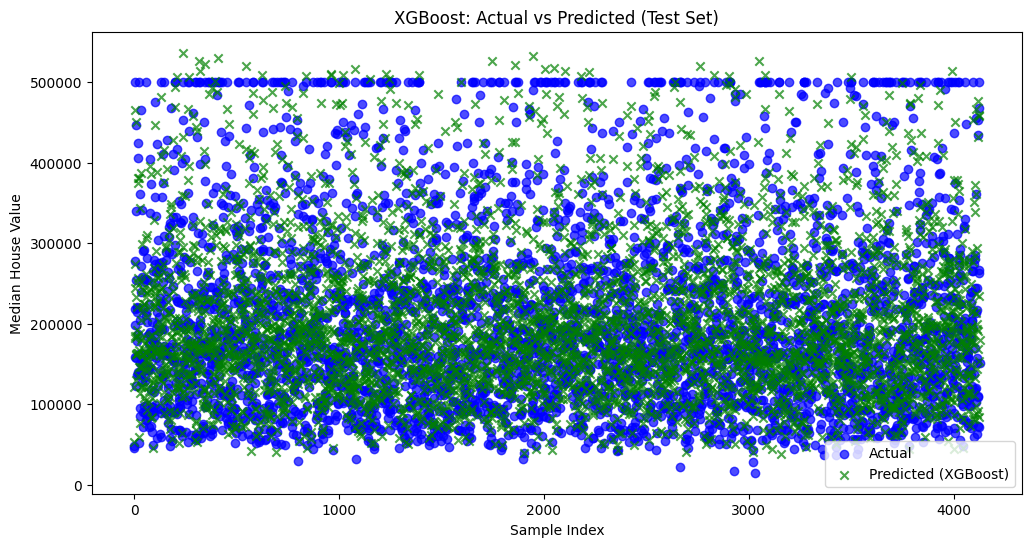

In [221]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7, color="blue")
plt.scatter(range(len(y_test)), y_test_pred_xgb, label="Predicted (XGBoost)", alpha=0.7, color="green", marker='x')
plt.legend()
plt.title("XGBoost: Actual vs Predicted (Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("Median House Value")
plt.show()


The scatter plot illustrates the performance of the XGBoost model by comparing actual (blue) and predicted (green) median_house_value values for the test set. The predictions closely align with the actual values, especially in lower to mid-value ranges, indicating good model performance. The consistency demonstrates XGBoost’s ability to capture patterns in the data effectively, as reflected by the high R2 of 0.6931 and Testing MSE of 4.02 billion.